# Experiment 2. Тестирование методов борьбы с дисбалансом классов

В данном проекте мы будем тестировать несколько популярных методов борьбы с дисбалансом классов, чтобы улучшить производительность моделей машинного обучения. Дисбаланс классов является распространенной проблемой в задачах классификации, когда один класс представлен значительно большим количеством примеров, чем другой. Это может привести к тому, что модели будут предсказывать только доминирующий класс, игнорируя менее представленный.

## Цель

Целью данного тестирования является оценка различных методов обработки дисбаланса классов и их влияние на производительность моделей. Мы будем использовать метрику ROC AUC для оценки качества моделей и сравнения результатов.

## Ход работы

1. **Загрузка данных**: Мы начнем с загрузки и предварительной обработки данных, чтобы подготовить их для обучения моделей.

2. **Разделение данных**: Данные будут разделены на обучающую и тестовую выборки, что позволит нам оценить производительность моделей на невидимых данных.

3. **Обучение базовой модели**: Мы обучим базовую модель (например, логистическую регрессию или дерево решений) на оригинальных данных, чтобы установить контрольный уровень производительности.

4. **Тестирование методов обработки дисбаланса**: Мы протестируем несколько методов борьбы с дисбалансом классов, включая:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Метод, который создает синтетические примеры для меньшинственного класса.
   - **ADASYN (Adaptive Synthetic Sampling)**: Метод, который также создает синтетические примеры, но с учетом сложности примеров.
   - **Tomek Links**: Метод, который удаляет примеры, находящиеся близко к границе между классами, чтобы улучшить разделение классов.
   - **Random Oversampling**: Метод, который случайным образом дублирует примеры меньшинственного класса для увеличения его представительности.
   - и тд

5. **Оценка моделей**: Каждая модель будет оценена на тестовой выборке с использованием метрики ROC AUC. Мы будем сравнивать производительность моделей, чтобы определить, какой метод обработки дисбаланса показывает наилучшие результаты.

6. **Выбор лучшего метода**: На основе полученных значений ROC AUC мы выберем метод с наивысшей производительностью.


## Заключение

В результате данного тестирования мы сможем определить, какие методы борьбы с дисбалансом классов наиболее эффективны для нашей задачи, а также выявить, как они влияют на производительность моделей.


In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

from utils.roc_auc import plot_roc_curve
from utils.imbalance_processing import BalanceTransformer, plot_class_distribution

In [3]:
target_column = 'TARGET'

In [4]:
data = pd.read_csv("./data/processed_data/processed_application_train.csv", index_col=0)

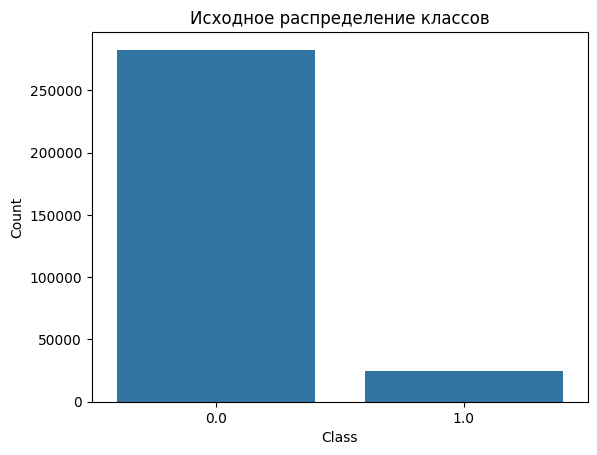

In [5]:
plot_class_distribution(data[target_column], title='Исходное распределение классов')

In [6]:
X = data.drop(columns=[target_column])
y = data[target_column] 


Обработка дисбаланса с помощью метода: smote
smote


/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

Confusion Matrix:
[[84840     1]
 [ 7413     0]]

Обработка дисбаланса с помощью метода: adasyn
adasyn


/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

Confusion Matrix:
[[84840     1]
 [ 7413     0]]

Обработка дисбаланса с помощью метода: tomek
tomek


/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

Confusion Matrix:
[[84840     1]
 [ 7413     0]]

Обработка дисбаланса с помощью метода: smote_enn
smote_enn


/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

Confusion Matrix:
[[84840     1]
 [ 7413     0]]

Обработка дисбаланса с помощью метода: smote_tomek
smote_tomek


/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

Confusion Matrix:
[[84840     1]
 [ 7413     0]]

AUC для каждого метода:
smote: 0.6276
adasyn: 0.6276
tomek: 0.6276
smote_enn: 0.6276
smote_tomek: 0.6276


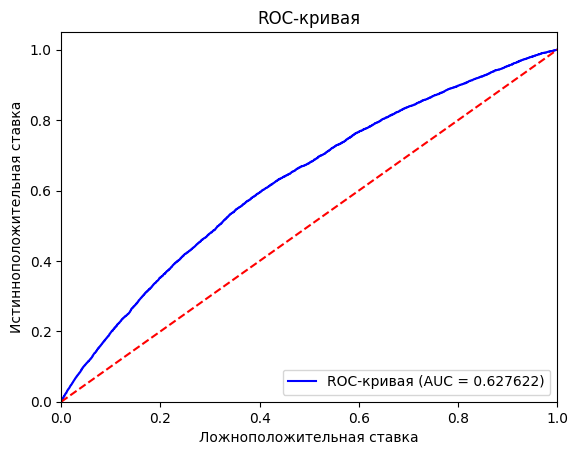

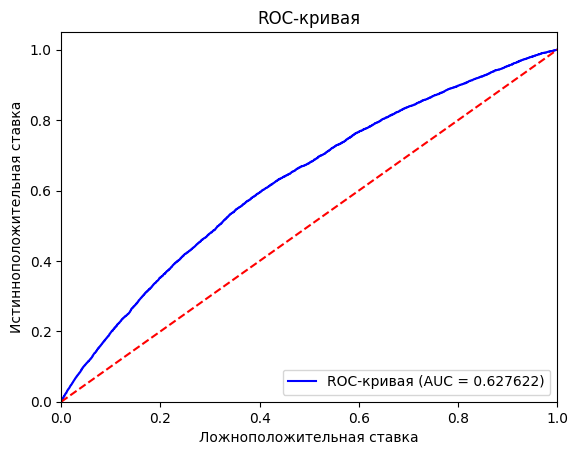

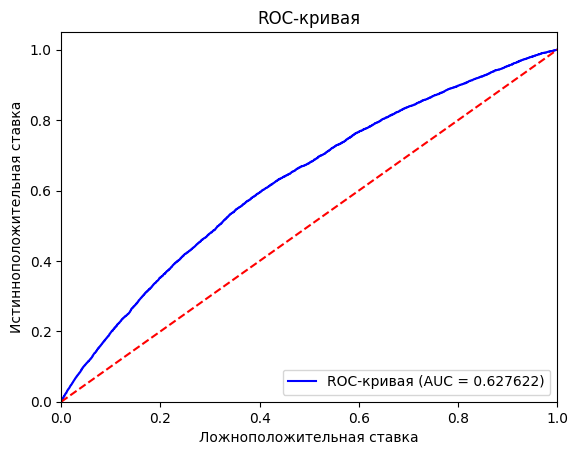

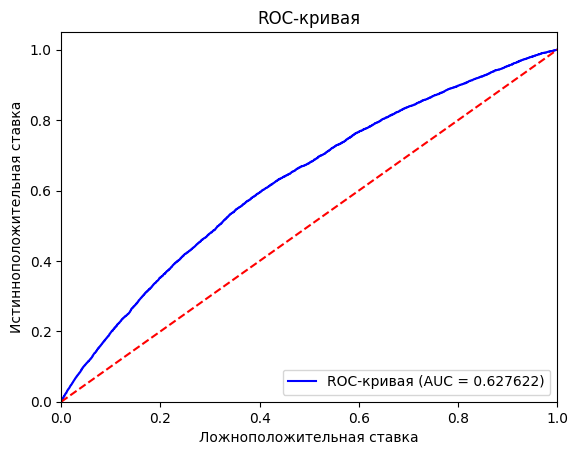

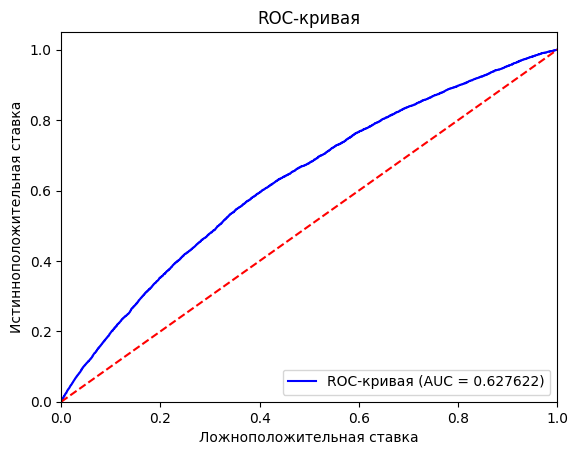

In [13]:
methods = ['smote', 'adasyn', 'tomek', 'smote_enn', 'smote_tomek']

def train_and_evaluate(X, y, balance_method='smote'):
    """Функция для обучения и оценки модели логистической регрессии."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Создаем пайплайн
    pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('balance', BalanceTransformer(balance_method)), 
        ('model', LogisticRegression())
    ])
    
    # Обучаем модель
    pipeline.fit(X_train, y_train)

    # Предсказание
    y_pred = pipeline.predict(X_test)

    # Оценка
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Вычисляем AUC
    roc_auc = plot_roc_curve(pipeline, X_test, y_test, need_plot=0)
    
    return roc_auc

# Словарь для хранения AUC для каждого метода
auc_scores = {}

# Пример использования
for method in methods:
    print(f"\nОбработка дисбаланса с помощью метода: {method}")
    auc_score = train_and_evaluate(X, y, balance_method=method)
    auc_scores[method] = auc_score

# Выводим результаты
print("\nAUC для каждого метода:")
for method, score in auc_scores.items():
    print(f"{method}: {score:.4f}")